In [1]:
from brainlit.utils import session
from brainlit.feature_extraction import *
import napari

In [2]:
url = "s3://mouse-light-viz/precomputed_volumes/brain1"
sess = session.NeuroglancerSession(url=url, url_segments=url+"_segments", mip=0)

In [3]:
nbr = NeighborhoodFeatures(url=url, size=3, offset=[50,50,50], segment_url=url+"_segments")
nbr.fit(seg_ids=[2], num_verts=1000, file_path='demo', batch_size=500)

Downloading:   0%|          | 0/1 [00:00<?, ?it/s]


In [5]:
import glob, feather
feathers = glob.glob('*.feather')


for count, feather_file in enumerate(feathers):
    if count == 0:
        data = feather.read_dataframe(feather_file)
    else:
        df = feather.read_dataframe(feather_file)
        data = pd.concat([data, df])
data.shape

(2000, 30)

In [6]:
X = data.iloc[:, 3:]
y = data["Label"]

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
y_score = clf.predict_proba(X_test)

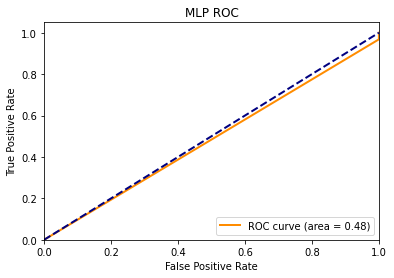

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC')
plt.legend(loc="lower right")
plt.show()

In [11]:
X.iloc[:, 14]

0    13823
1    12363
2    12628
3    12399
4    12537
5    12336
6    12485
7    12241
8    12774
9    12279
0    12893
1    12316
2    17840
3    12328
4    13947
5    12335
6    13570
7    12210
8    12388
9    12195
Name: 14, dtype: int64

In [22]:
from sklearn.linear_model import LogisticRegression
X_center = X.iloc[:, 14].values.reshape(-1,1)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_center, y, stratify=y, random_state=1)
clf = LogisticRegression(random_state=0).fit(Xc_train, yc_train)
yc_score = clf.predict(Xc_test)

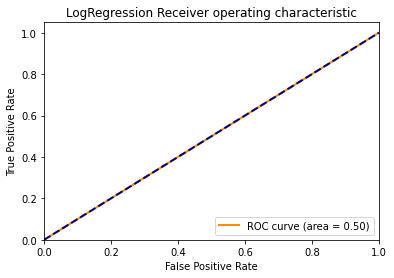

In [23]:
fpr_c, tpr_c, _ = roc_curve(yc_test, yc_score)
roc_auc_c = auc(fpr_c, tpr_c)

plt.figure()
lw = 2
plt.plot(fpr_c, tpr_c, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_c)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogRegression Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()